In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc('font', size=14)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Crime_Data_Clean.csv')
data.dropna()
print(data.shape)
print(list(data.columns))

(202320, 30)
['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time', 'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name', 'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type', 'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude', 'Police District Number', 'Location', 'IsSeriousCrime']


In [3]:
data.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,IsSeriousCrime
0,201202980,3550.0,180042096,8/23/2018 21:52,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,MIDDLEBROOK,NaN,RD,8/23/2018 21:52,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)",1
1,201181293,3522.0,180015424,3/30/2018 1:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,WOODMONT,NaN,AVE,3/30/2018 1:01,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)",1
2,201181293,3562.0,180015424,3/30/2018 1:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,WOODMONT,NaN,AVE,3/30/2018 1:01,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)",1
3,201193163,3520.0,180029476,6/14/2018 22:26,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,QUINCE ORCHARD,NaN,RD,6/14/2018 22:26,6/15/2018 3:00,39.147954,-77.218189,6D,"(39.148, -77.2182)",1
4,201204355,2204.0,180043926,9/3/2018 12:06,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,FALSTONE,NaN,AVE,9/2/2018 23:30,9/3/2018 0:30,38.966174,-77.096561,2D,"(38.9662, -77.0966)",0


In [4]:
data['Crime Name1'].unique()

array(['Crime Against Society', 'Crime Against Property',
       'Crime Against Person', 'Other', 'Not a Crime'], dtype=object)

In [5]:
a = len(data[data['Crime Name1']=='Crime Against Society'])
b = len(data[data['Crime Name1']=='Crime Against Property'])
c = len(data[data['Crime Name1']=='Crime Against Person'])
d = len(data[data['Crime Name1']=='Other'])
e = len(data[data['Crime Name1']=='Not a Crime'])
f = len(data['Crime Name1'])
import pandas as pd

#initialize list of crimes
data1 = [['Crime Against Society', a, a/f], ['Crime Against Property', b, b/f], ['Crime Against Person', c, c/f], 
         ['Other', d, d/f], ['Not a Crime', e, e/f]]

#Create a panda dataframe
df = pd.DataFrame(data1, columns = ['Crime Type', 'Count', 'Percentage'])

#Print dataframe
df

,Crime Type,Count,Percentage
0,Crime Against Society,40604,0.200692
1,Crime Against Property,78041,0.385731
2,Crime Against Person,17466,0.086329
3,Other,62634,0.309579
4,Not a Crime,3575,0.017670


In [6]:
data['IsSeriousCrime'].value_counts()

0    149632
1     52688
Name: IsSeriousCrime, dtype: int64

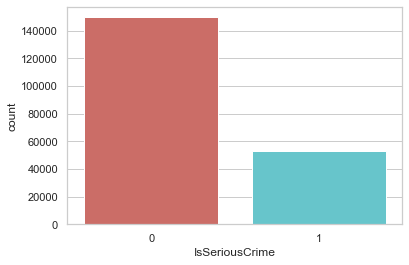

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='IsSeriousCrime', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [8]:
count_serious = len(data[data['IsSeriousCrime']==1])
count_notseriuos = len(data[data['IsSeriousCrime']==0])
pct_of_serious = count_serious/(count_notseriuos+count_serious)
print("Percentage of serious Crime is: ", pct_of_serious)
pct_of_notserious = count_notseriuos/(count_notseriuos+count_serious)
print("Percentage of not serious Crime is: ", pct_of_notserious)

Percentage of serious Crime is:  0.2604191379992092
Percentage of not serious Crime is:  0.7395808620007909


In [9]:
data.groupby('IsSeriousCrime').mean()

,Incident ID,Offence Code,CR Number,Victims,Zip Code,PRA,Address Number,Latitude,Longitude
IsSeriousCrime,,,,,,,,,
0,2.012293e+08,5632.053285,1.606086e+08,1.005066,20874.509580,367.295408,8232.493943,38.038374,-75.059298
1,2.012061e+08,3120.601921,1.458676e+08,1.065442,20879.173727,377.463374,8682.226631,36.853267,-72.708739


In [10]:
data.groupby('Crime Name1').mean()

,Incident ID,Offence Code,CR Number,Victims,Zip Code,PRA,Address Number,Latitude,Longitude,IsSeriousCrime
Crime Name1,,,,,,,,,,
Crime Against Person,2.012335e+08,1539.596702,1.594634e+08,1.204168,20878.804418,386.892495,8755.001971,37.717809,-74.411588,0.931925
Crime Against Property,2.012243e+08,2427.535488,1.535880e+08,1.000000,20872.968919,362.402550,8417.983870,37.824593,-74.639688,0.143591
Crime Against Society,2.011854e+08,4608.139444,1.361946e+08,1.000000,20882.167267,366.276459,8486.740458,36.760607,-72.533614,0.620752
Not a Crime,2.012335e+08,9021.000000,1.665106e+08,1.000559,20879.335306,392.129303,8781.221413,38.569649,-76.084934,0.000000
Other,2.012430e+08,9123.859130,1.727655e+08,1.010186,20873.921043,375.727943,8011.573434,38.195235,-75.364237,0.000000


<AxesSubplot:xlabel='IsSeriousCrime', ylabel='count'>

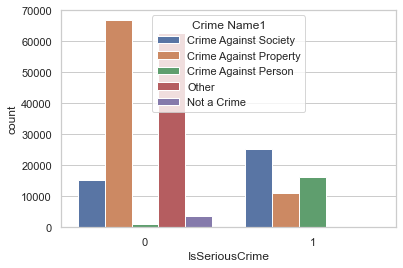

In [11]:
sns.countplot(data=data, x='IsSeriousCrime', hue='Crime Name1')

In [12]:
data.groupby('Crime Name1')['IsSeriousCrime'].value_counts().unstack()

IsSeriousCrime,0,1
Crime Name1,,
Crime Against Person,1189.0,16277.0
Crime Against Property,66835.0,11206.0
Crime Against Society,15399.0,25205.0
Not a Crime,3575.0,NaN
Other,62634.0,NaN


<AxesSubplot:xlabel='Crime Name1'>

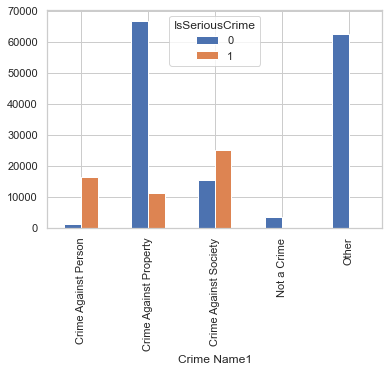

In [13]:
data.groupby('Crime Name1')['IsSeriousCrime'].value_counts().unstack().plot.bar()

In [14]:
data.groupby('Crime Name1')['IsSeriousCrime'].mean().sort_values(ascending=False)

Crime Name1
Crime Against Person      0.931925
Crime Against Society     0.620752
Crime Against Property    0.143591
Not a Crime               0.000000
Other                     0.000000
Name: IsSeriousCrime, dtype: float64

In [15]:
#Create dummy variables
cat_vars = ['Crime Name1']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
    
cat_vars=['Crime Name1']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [16]:
data_final = data[to_keep]
data_final.pop('Start_Date_Time')
data_final.pop('End_Date_Time')
data_final.pop('Dispatch Date / Time')
data_final.pop('NIBRS Code')
data_final.pop('Crime Name2')
data_final.pop('Crime Name3')
data_final.pop('Police District Name')
data_final.pop('City')
data_final.pop('State')
data_final.pop('Agency')
data_final.pop('Place')
data_final.pop('Sector')
data_final.pop('Beat')
data_final.pop('Street Suffix')
data_final.pop('Street Type')
data_final.pop('Address Number')
data_final.pop('Street Prefix')
data_final.pop('Street Name')
data_final.pop('Police District Number')
data_final.pop('Location')
np.any(np.isnan(data_final))
np.all(np.isfinite(data_final))
df = data_final[np.isfinite(data_final).all(1)]
df

,Incident ID,Offence Code,CR Number,Victims,Zip Code,PRA,Latitude,Longitude,IsSeriousCrime,Crime Name1_Crime Against Person,Crime Name1_Crime Against Property,Crime Name1_Crime Against Society,Crime Name1_Not a Crime,Crime Name1_Other
0,201202980,3550.0,180042096,1,20874.0,447.0,39.177744,-77.265619,1,0,0,1,0,0
1,201181293,3522.0,180015424,1,20814.0,54.0,38.992693,-77.097063,1,0,0,1,0,0
2,201181293,3562.0,180015424,1,20814.0,54.0,38.992693,-77.097063,1,0,0,1,0,0
3,201193163,3520.0,180029476,1,20878.0,445.0,39.147954,-77.218189,1,0,0,1,0,0
4,201204355,2204.0,180043926,1,20815.0,17.0,38.966174,-77.096561,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202315,201201247,2901.0,180039929,1,20853.0,340.0,39.084805,-77.098833,1,0,1,0,0,0
202316,201194674,3562.0,180031899,1,20910.0,107.0,38.999677,-77.027913,1,0,0,1,0,0
202317,201197878,2404.0,180035758,1,20904.0,378.0,39.081051,-76.946369,0,0,1,0,0,0
202318,201198555,1306.0,180036742,1,20876.0,474.0,39.202370,-77.257200,1,1,0,0,0,0


In [17]:
# Over-Sampling using SMOTE
X = df.loc[:, df.columns != 'IsSeriousCrime']
y = df.loc[:, df.columns == 'IsSeriousCrime']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['IsSeriousCrime'])

# We can check the numbers of our data
print("Length of oversampled data is: ", len(os_data_X))
print("Number of serious crime in oversampled data is: ", len(os_data_y[os_data_y['IsSeriousCrime']==1]))
print("Number of not serious crime in oversampled data is: ", len(os_data_y[os_data_y['IsSeriousCrime']==0]))
print("Proportion of serious data in oversampled data is: ", len(os_data_y[os_data_y['IsSeriousCrime']==1])/len(os_data_X))
print("Proportion of not serious data in oversampled data is: ", len(os_data_y[os_data_y['IsSeriousCrime']==0])/len(os_data_X))

Length of oversampled data is:  197248
Number of serious crime in oversampled data is:  98624
Number of not serious crime in oversampled data is:  98624
Proportion of serious data in oversampled data is:  0.5
Proportion of not serious data in oversampled data is:  0.5


In [18]:
# Recursive Feature Elimination
df_vars = df.columns.values.tolist()
y = ['Crime Name1']
X = [i for i in df_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier(random_state=42)
rfe = RFE(dtmodel)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True False False False  True  True  True False
 False]
[3 1 1 8 1 4 5 2 1 1 1 7 6]


In [19]:
X = os_data_X
y = os_data_y
data_X2 = pd.DataFrame({
 'Feature': X.columns,
 'Importance': rfe.ranking_},)
data_X2.sort_values(by=['Importance'])

,Feature,Importance
1,Offence Code,1
2,CR Number,1
4,Zip Code,1
8,Crime Name1_Crime Against Person,1
9,Crime Name1_Crime Against Property,1
10,Crime Name1_Crime Against Society,1
7,Longitude,2
0,Incident ID,3
5,PRA,4
6,Latitude,5


In [20]:
cols=[]
for i in range (0, len(data_X2['Importance'])):
    if data_X2['Importance'][i] == 1:
        cols.append(data_X2['Feature'][i])
print(cols)
print(len(cols))

['Offence Code', 'CR Number', 'Zip Code', 'Crime Name1_Crime Against Person', 'Crime Name1_Crime Against Property', 'Crime Name1_Crime Against Society']
6


In [21]:
# Decision Tree Classifier Model fitting
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy of Decision Tree Classifier on test set: ","{:.2%}".format(accuracy_score(y_test, y_pred)))

Accuracy of Decision Tree Classifier on test set:  99.92%


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[32302    19]
 [   33 32738]]


In [24]:
print("The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),'correct predictions.')
print("The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),'incorrect predictions.')
print("We have a total predictions of: ",(confusion_matrix.sum()))

The result is telling us that we have:  65040 correct predictions.
The result is telling us that we have:  52 incorrect predictions.
We have a total predictions of:  65092


In [25]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32321
           1       1.00      1.00      1.00     32771

    accuracy                           1.00     65092
   macro avg       1.00      1.00      1.00     65092
weighted avg       1.00      1.00      1.00     65092



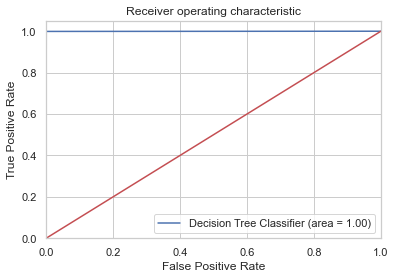

In [26]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

In [27]:
# Features Importance
serious_features = [x for i,x in enumerate(X.columns) if i!=len(X.columns)]
print("Feature importances:\n{}".format(model.feature_importances_))

Feature importances:
[3.02987026e-04 7.36348092e-01 1.17856288e-03 0.00000000e+00
 5.14564856e-04 2.12275757e-04 9.33503684e-04 2.37227842e-04
 5.61394301e-03 2.53905906e-01 6.10607700e-04 0.00000000e+00
 1.42329837e-04]


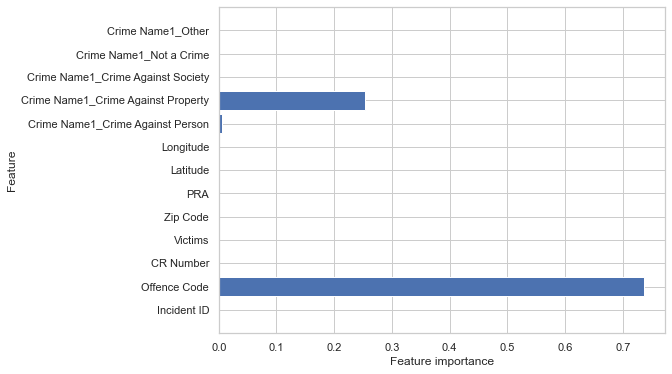

In [30]:
# Feature Importance Visualization
def plot_feature_importances_crime(model):
    plt.figure(figsize=(8,6))
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), serious_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
 
plot_feature_importances_crime(model)
plt.savefig('feature_importance')